<a href="https://colab.research.google.com/github/EnniodosSantos/Notebook-Estagiar-Globo/blob/main/EstagiarGlobo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados de Marca, Saúde e Reputação
Objetivo da Análise

Este estudo busca compreender a reputação e saúde de marca com base em critérios de percepção do consumidor — como sabor, preço, popularidade, disponibilidade no mercado e variedade de sabores. O objetivo é identificar fatores determinantes da popularidade, semelhanças entre marcas e o equilíbrio interno de atributos que sustentam a força competitiva de cada marca no mercado de bebidas.

## Radar Chart — Comparação Multidimensional de Desempenho

O gráfico radar apresenta uma visão multivariada do desempenho de cada marca em relação aos critérios avaliados.

No contexto de reputação, cada critério pode representar um indicador de saúde:

**Sabor** -> Qualidade do produto percebida.

**Preço** -> Acessibilidade e percepção de custo-benefício.

**Popularidade** -> Força da marca e identificação emocional.

**Disponibilidade** -> Alcance de distribuição e presença no mercado.

**Variedade de sabores** -> Inovação e diversificação de portfólio.


Esses indicadores ajudam a responder perguntas como:

- “Onde a marca está se desconectando do público?”

- “O que o consumidor valoriza mais?”

- “Qual marca está mais vulnerável ou mais sólida?”

### Interpretação:

Coca-Cola mantém alta performance em praticamente todos os critérios, destacando-se em Popularidade e Disponibilidade.

Pepsi exibe perfil equilibrado, com boa pontuação em Preço e Popularidade.

Guaraná Antarctica mostra força em Disponibilidade e Sabor.

Dolly e Sukita destacam-se apenas em Preço, refletindo uma estratégia de valor acessível.

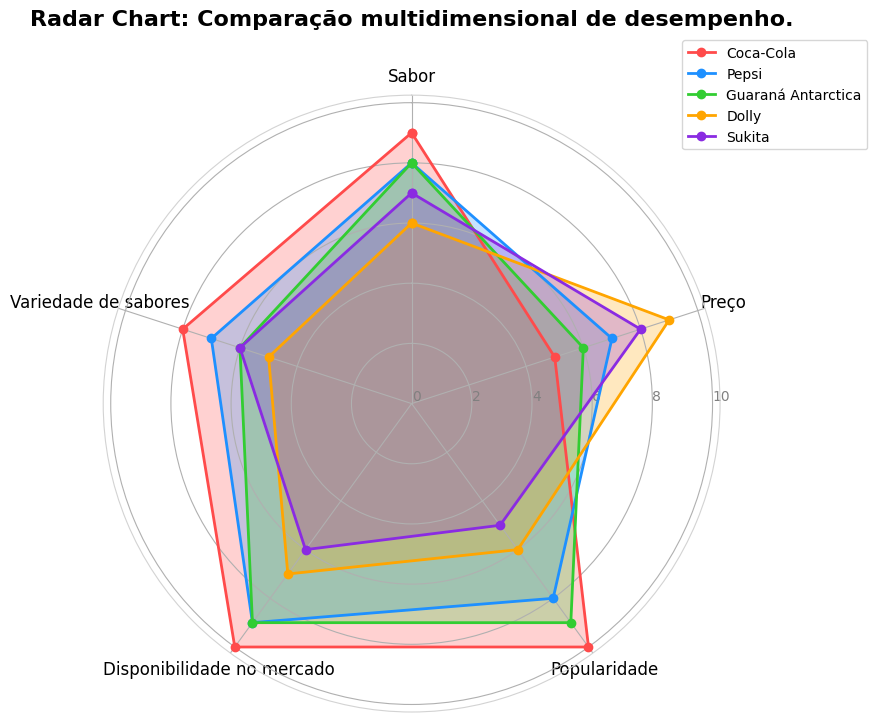

In [1]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyBboxPatch

dados = {
    'Critério': ['Sabor', 'Preço', 'Popularidade', 'Disponibilidade no mercado', 'Variedade de sabores'],
    'Coca-Cola': [9, 5, 10, 10, 8],
    'Pepsi': [8, 7, 8, 9, 7],
    'Guaraná Antarctica': [8, 6, 9, 9, 6],
    'Dolly': [6, 9, 6, 7, 5],
    'Sukita': [7, 8, 5, 6, 6]
}
df = pd.DataFrame(dados)

metrics = df['Critério'].tolist()
marcas = df.columns[1:].tolist()

# --- Função de gráfico radar ---
def plot_radar_chart(df, metrics, marcas, title=" "):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])  # fecha o círculo

    fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={'projection': 'polar'})

    # Estilo geral
    ax.set_title(title, y=1.1, fontsize=16, fontweight='bold')
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    ax.spines['polar'].set_color('lightgrey')

    # Paleta de cores
    color_palette = ['#FF4B4B', '#1E90FF', '#32CD32', '#FFA500', '#8A2BE2']

    # Plotar cada marca
    for idx, marca in enumerate(marcas):
        values = df[marca].tolist()
        values = values + [values[0]]  # fecha o círculo

        ax.plot(theta, values, linewidth=2, linestyle='solid',
                label=marca, marker='o', markersize=6,
                color=color_palette[idx % len(color_palette)])
        ax.fill(theta, values, alpha=0.25, color=color_palette[idx % len(color_palette)])

    # Eixos e rótulos
    ax.set_xticks(theta[:-1])
    ax.set_xticklabels(metrics, size=12)
    ax.set_yticks(range(0, 11, 2))
    ax.set_yticklabels([str(i) for i in range(0, 11, 2)], color="gray", size=10)
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1))

    plt.tight_layout()
    return fig

# --- Gerar gráfico ---
fig = plot_radar_chart(df, metrics, marcas, title="Radar Chart: Comparação multidimensional de desempenho.")
plt.show()

## Reputação Geral — Média de Desempenho por Marca

A pontuação média sintetiza o desempenho global de cada marca.

Ranking de reputação:

Coca-Cola — 8.4

Pepsi — 7.8

Guaraná Antarctica — 7.6

Dolly — 6.6

Sukita — 6.4

Insight: Coca-Cola lidera com ampla vantagem, consolidando-se como referência de qualidade e lembrança de

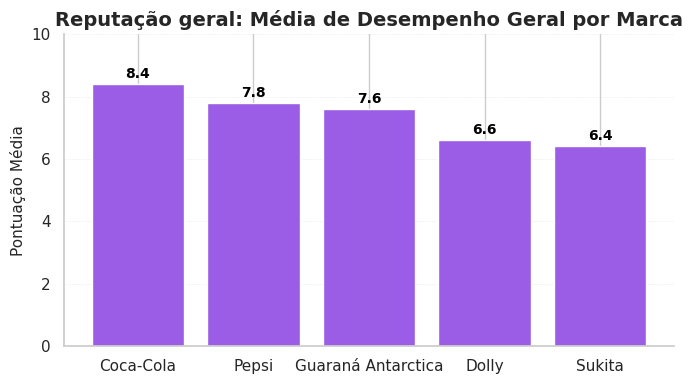

In [8]:
# @title
dados = {
    "Marca": ["Coca-Cola", "Pepsi", "Guaraná Antarctica", "Dolly", "Sukita"],
    "Sabor": [9, 8, 8, 6, 7],
    "Preço": [5, 7, 6, 9, 8],
    "Popularidade": [10, 8, 9, 6, 5],
    "Disponibilidade no mercado": [10, 9, 9, 7, 6],
    "Variedade de sabores": [8, 7, 6, 5, 6]
}
df = pd.DataFrame(dados)

# --- Cálculo das médias ---
df["Média"] = df[["Sabor", "Preço", "Popularidade", "Disponibilidade no mercado", "Variedade de sabores"]].mean(axis=1)
df_plot = df[["Marca", "Média"]].sort_values("Média", ascending=False)

# --- Gráfico ---
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(7, 4))
cor_barras = "#9B5DE5"

bars = ax.bar(df_plot["Marca"], df_plot["Média"], color=cor_barras)

# Rótulos
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
            f"{bar.get_height():.1f}", ha='center', color='black', fontsize=10, fontweight='bold')

# Ajustes visuais
ax.set_ylim(0, 10)
ax.set_ylabel("Pontuação Média", fontsize=11)
ax.set_title("Reputação geral: Média de Desempenho Geral por Marca", fontsize=14, fontweight='bold')
ax.grid(axis='y', linestyle=':', linewidth=0.5, alpha=0.6)
sns.despine()

plt.tight_layout()
plt.show()

## Correlação entre Critérios e Popularidade

Foram calculadas as correlações de Pearson entre Popularidade e os demais critérios.
O objetivo é entender quais atributos mais impactam a popularidade de cada marca.

| Critério                 | Correlação (r) com Popularidade | Interpretação                                                                                |
| ------------------------ | ------------------------------- | -------------------------------------------------------------------------------------------- |
| **Sabor**                | +0.87                           | Forte correlação positiva — sabor é altamente determinante.                                  |
| **Preço**                | +0.91                           | Forte correlação positiva — percepção de valor e preço equilibrado impulsionam popularidade. |
| **Disponibilidade**      | +0.38                           | Correlação muito forte — marcas amplamente disponíveis são também as mais populares.|
| **Variedade de sabores** | +0.72                           | Correlação moderada — diversificação contribui para maior apelo de marca.                    |


Síntese: o público associa popularidade a sabor e valor percebido (preço) — dois pilares-chave da decisão de compra.

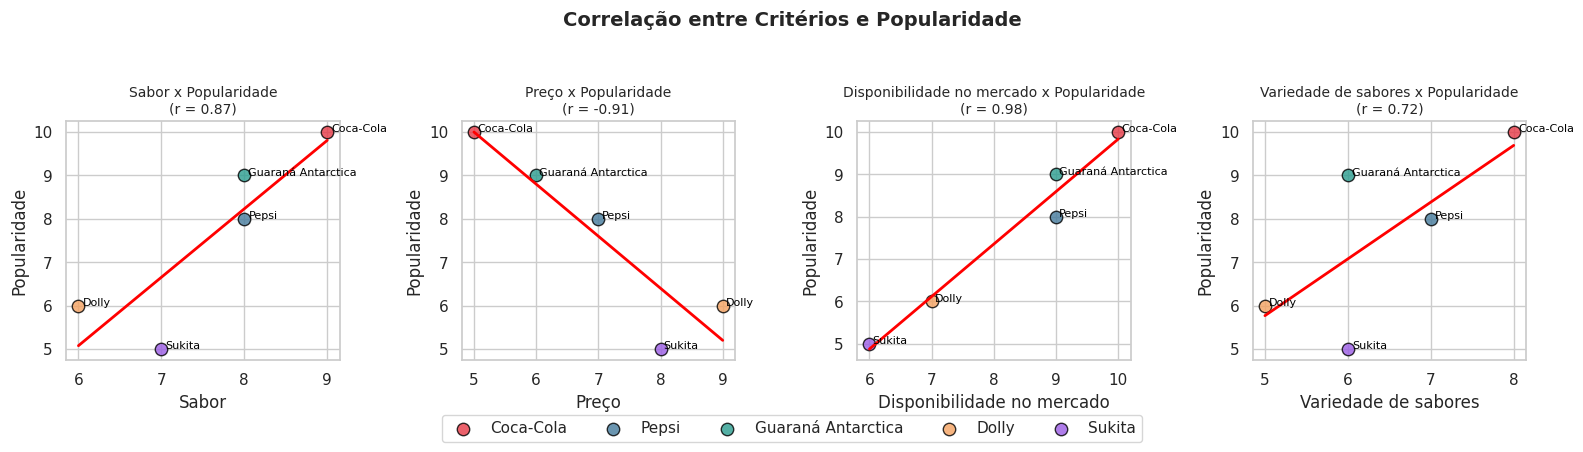

In [9]:
# @title
dados = {
    'Critério': ['Sabor', 'Preço', 'Popularidade', 'Disponibilidade no mercado', 'Variedade de sabores'],
    'Coca-Cola': [9, 5, 10, 10, 8],
    'Pepsi': [8, 7, 8, 9, 7],
    'Guaraná Antarctica': [8, 6, 9, 9, 6],
    'Dolly': [6, 9, 6, 7, 5],
    'Sukita': [7, 8, 5, 6, 6]
}

df = pd.DataFrame(dados)

df_t = df.set_index('Critério').T  # linhas = marcas | colunas = critérios

# --- Correlação de Pearson ---
variaveis = ['Sabor', 'Preço', 'Disponibilidade no mercado', 'Variedade de sabores']
correlacoes = {v: df_t[v].corr(df_t['Popularidade'], method='pearson') for v in variaveis}

# --- Paleta de cores personalizada ---
cores_marcas = {
   'Coca-Cola': '#E63946',
    'Pepsi': '#457B9D',
    'Guaraná Antarctica': '#2A9D8F',
    'Dolly': '#F4A261',
    'Sukita': '#9B5DE5'
}

# --- Gráficos de dispersão ---
fig, axes = plt.subplots(1, len(variaveis), figsize=(16, 4))
sns.set_style("whitegrid")

for i, var in enumerate(variaveis):
    # Plot manual com cores por marca
    for marca in df_t.index:
        axes[i].scatter(
            df_t.loc[marca, var],
            df_t.loc[marca, 'Popularidade'],
            color=cores_marcas[marca],
            s=80,
            edgecolor='black',
            alpha=0.8,
            label=marca if i == 0 else ""  # legenda apenas no primeiro gráfico
        )
        axes[i].text(
            df_t.loc[marca, var] + 0.05,
            df_t.loc[marca, 'Popularidade'],
            marca,
            fontsize=8,
            color='black'
        )

    # Linha de regressão
    sns.regplot(
        x=df_t[var],
        y=df_t['Popularidade'],
        ax=axes[i],
        scatter=False,
        line_kws={'color': 'red', 'lw': 2},
        ci=None
    )

    axes[i].set_title(f"{var} x Popularidade\n(r = {correlacoes[var]:.2f})", fontsize=10)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Popularidade")

# --- Legenda geral ---
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.05))

# --- Título centralizado no topo ---
fig.suptitle("Correlação entre Critérios e Popularidade",
             fontsize=14, fontweight='bold', y=1.05, ha='center')

plt.tight_layout()
plt.show()

## Dendrograma

O dendrograma mostra o grau de semelhança entre as marcas, agrupando aquelas que têm características mais próximas.

### Interpretação

Coca-Cola e Pepsi formam o primeiro grupo (menor distância):
→ Marcas líderes, com perfis muito parecidos em popularidade e distribuição, sendo percebidas como premium.

Guaraná Antarctica se une a esse grupo em seguida:
→ Mantém proximidade com as líderes, mas tem perfil levemente diferenciado (sabor e identidade nacional).

Dolly e Sukita formam outro grupo mais distante:
→ Ambas têm preço mais baixo e menor popularidade, voltadas para um público mais sensível a preço.

O mercado se divide claramente em dois blocos:
(1) Marcas de alto prestígio e reconhecimento (Coca-Cola, Pepsi, Guaraná Antarctica)
(2) Marcas econômicas (Dolly, Sukita).

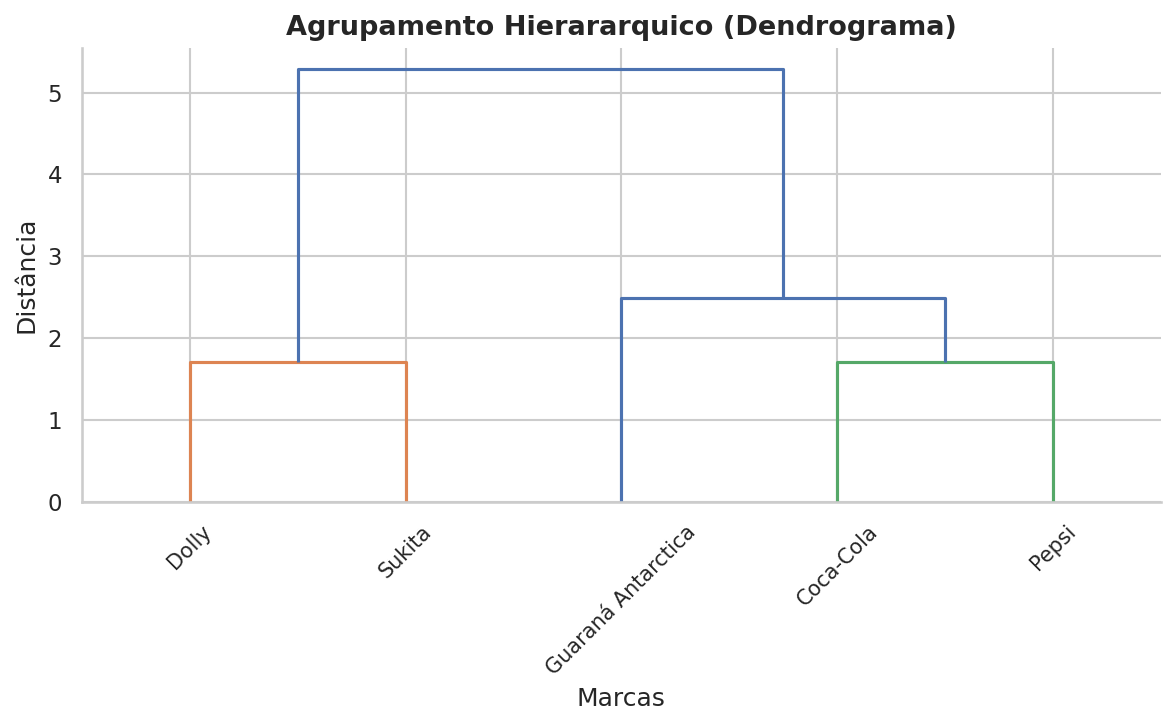

In [12]:
# @title
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# --- Dataset exemplo ---
dados = {
    'Marca': ['Coca-Cola', 'Pepsi', 'Guaraná Antarctica', 'Dolly', 'Sukita'],
    'Sabor': [9, 8, 8, 6, 7],
    'Preço': [5, 6, 7, 8, 7],
    'Disponibilidade': [10, 9, 8, 7, 6],
    'Variedade de Sabores': [8, 7, 9, 6, 5],
}
df = pd.DataFrame(dados)

# --- Pré-processamento ---
X = df[['Sabor', 'Preço', 'Disponibilidade', 'Variedade de Sabores']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Hierarchical Clustering ---
linkage_matrix = linkage(X_scaled, method='ward')

# --- Criar clusters (2 grupos) ---
num_clusters = 3
df['Cluster_Hier'] = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# --- Visualização ---
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 200

plt.figure(figsize=(8, 5))

# Definir limiar de cor baseado na altura dos clusters
# → Isso separa os grupos por cor automaticamente
dendrogram(
    linkage_matrix,
    labels=df['Marca'].values,
    leaf_rotation=45,
    leaf_font_size=10,
    color_threshold=linkage_matrix[-(num_clusters-1), 2],  # separa exatamente 2 grupos
)

plt.title("Agrupamento Hierararquico (Dendrograma)", fontsize=13, fontweight='bold')
plt.xlabel("Marcas")
plt.ylabel("Distância")
sns.despine()
plt.tight_layout()
plt.show()


## Índice Composto de Saúde de Marca (Brand Health Score)

O índice foi calculado a partir da média normalizada dos critérios:
**Sabor**, **Preço**, **Popularidade**, **Disponibilidade no mercado** e **Variedade de sabores**.

- **Coca-Cola** lidera amplamente, refletindo força global e consistência de marca.
- **Pepsi** e **Guaraná Antarctica** apresentam boa saúde, com equilíbrio entre percepção e presença de mercado.
- **Dolly** e **Sukita** mostram baixo desempenho relativo, concentrando força apenas em preço.

Esse índice resume a *saúde geral da marca*, permitindo comparar estratégias competitivas.


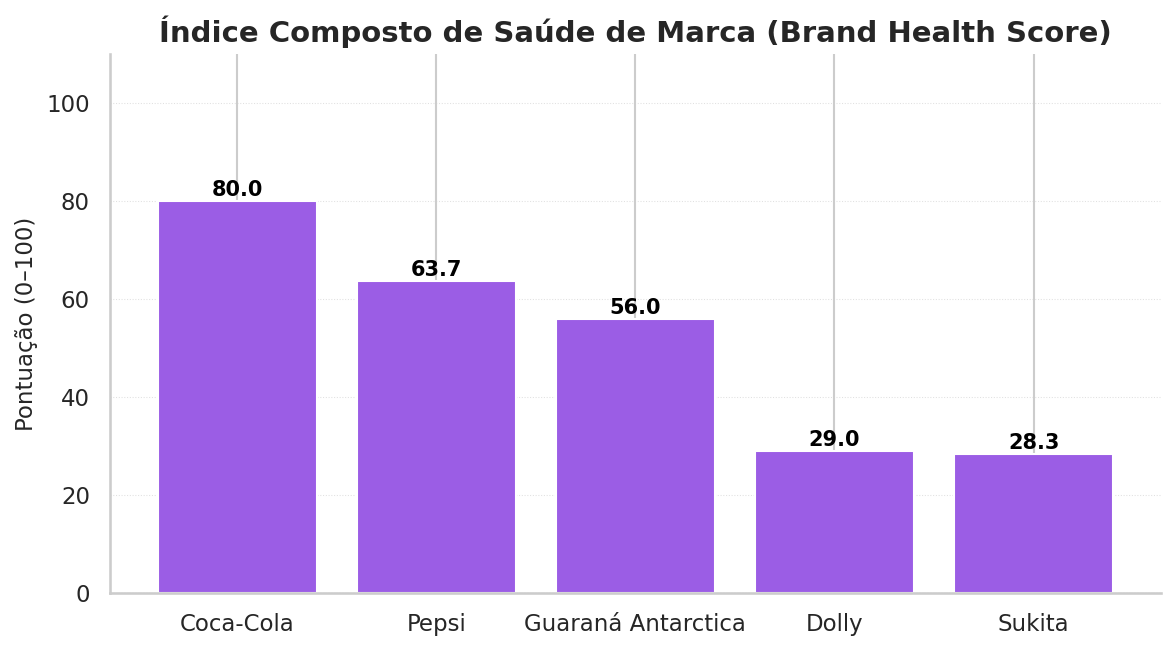

In [13]:
# @title
from sklearn.preprocessing import MinMaxScaler

# --- Dados ---
data = {
    "Marca": ["Coca-Cola", "Pepsi", "Guaraná Antarctica", "Dolly", "Sukita"],
    "Sabor": [9, 8, 8, 6, 7],
    "Preço": [5, 7, 6, 9, 8],
    "Popularidade": [10, 8, 9, 6, 5],
    "Disponibilidade no mercado": [10, 9, 9, 7, 6],
    "Variedade de sabores": [8, 7, 6, 5, 6]
}
df = pd.DataFrame(data)

# --- Normalização ---
metricas = ["Sabor", "Preço", "Popularidade", "Disponibilidade no mercado", "Variedade de sabores"]
scaler = MinMaxScaler()
df[metricas] = scaler.fit_transform(df[metricas])

# --- Índice composto ---
df["Brand_Health_Score"] = df[metricas].mean(axis=1) * 100
df_plot = df[["Marca", "Brand_Health_Score"]].sort_values("Brand_Health_Score", ascending=False)

# --- Gráfico ---
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 4.5))
cor_barras = "#9B5DE5"

bars = ax.bar(df_plot["Marca"], df_plot["Brand_Health_Score"], color=cor_barras)

# Rótulos
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f"{bar.get_height():.1f}", ha='center', color='black', fontsize=10, fontweight='bold')

# Ajustes visuais
ax.set_ylim(0, 110)
ax.set_ylabel("Pontuação (0–100)", fontsize=11)
ax.set_title("Índice Composto de Saúde de Marca (Brand Health Score)", fontsize=14, fontweight='bold')
ax.grid(axis='y', linestyle=':', linewidth=0.5, alpha=0.6)
sns.despine()

plt.tight_layout()
plt.show()

## Conclusão

A análise evidencia que a saúde de marca está diretamente ligada ao equilíbrio entre qualidade percebida, distribuição e força emocional.
Marcas líderes, como Coca-Cola e Guaraná Antarctica, mantêm vantagem competitiva por conseguir combinar consistência de produto, presença de mercado e vínculo afetivo com o consumidor.

Já Pepsi ocupa um espaço intermediário, competitiva, porém menos dominante no imaginário coletivo.
Dolly e Sukita, embora relevantes em preço, enfrentam desafios de percepção e diferenciação, necessitando estratégias de reposicionamento para elevar o valor simbólico de suas marcas.

Em síntese, a força de uma marca não depende apenas de preço ou sabor, mas do conjunto equilibrado de atributos que sustentam relevância, confiança e desejo no consumidor.

## Resumo — Saúde e Reputação de Marca
🔹 1. Liderança Sustentada

A Coca-Cola mantém liderança absoluta em todos os critérios, demonstrando alta coerência de marca e força emocional consolidada.

Estratégia: manter inovação contínua e reforço de branding global.

🔹 2. Espaço de Diferenciação

Guaraná Antarctica e Pepsi ocupam posições intermediárias com potencial de expansão.

Estratégia: investir em identidade local (Guaraná) e comunicação experiencial (Pepsi) para fortalecer diferenciação frente à líder.

🔹 3. Nicho de Valor Acessível

Dolly e Sukita competem em um segmento sensível a preço, mas com baixa percepção de valor simbólico.

Estratégia: reposicionar imagem, reforçar autenticidade e buscar melhor distribuição e portfólio.

🔹 4. Correlação de Fatores

A popularidade correlaciona-se fortemente com sabor e disponibilidade, sugerindo que melhorias nesses atributos têm impacto direto na força de marca.

🔹 5. Oportunidade Estratégica

O mercado mostra polarização entre marcas premium e econômicas, abrindo espaço para novos posicionamentos intermediários, que combinem valor acessível e identidade de marca forte.